# Box Plot
The box plot shows the distribution of countries’ graduation ratios for girls and boys from 2014 to 2017. The Graduation ratio can be larger than 100% because UNESCO calculates the [graduation ratio](http://uis.unesco.org/en/glossary-term/gross-graduation-ratio) by the total number of students graduating divided by the number of students that theoretically should be graduating in that year; students may fall behind one year and graduate the next year – making the ratio larger than 100%. 

### SetUp

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# helper function
def assign_continent(country_code):
    """given a 3 letter country code,
    return the continent the country belongs to"""
    try:
        row = country_to_continent[country_to_continent.Three_Letter_Country_Code == country_code]
        continent = row.Continent_Name.values[0]
        return continent
    except:
        return None

### Pre-Processing
1. Filter Columns
2. Rename Columns
3. Assign each continennt to each country
4. Filter out the non-country level rows

In [5]:
# read in data
grad = pd.read_csv('../data/graduation_ratio_under_secondary_edu.csv')
country_to_continent = pd.read_csv('../data/country_continent.csv')

# 1. filter columns
country_to_continent = country_to_continent[['Three_Letter_Country_Code', 'Continent_Name', 'Country_Name']]
grad = grad[['Indicator', 'LOCATION', 'Country', 'Time', 'Value']]
grad = grad[grad.Time != 2018]

# 2. rename column
grad = grad.replace('Gross graduation ratio from lower secondary education, female (%)', 
                           'Girls')
grad = grad.replace('Gross graduation ratio from lower secondary education, male (%)', 
                           'Boys')

# 3. Assign each country their continent
grad['Continent'] = grad.LOCATION.apply(lambda x: assign_continent(x))

# 4. keep only country level rows
countries = country_to_continent.Three_Letter_Country_Code.unique()
grad_by_country = grad[grad.LOCATION.isin(countries)]

### Plot

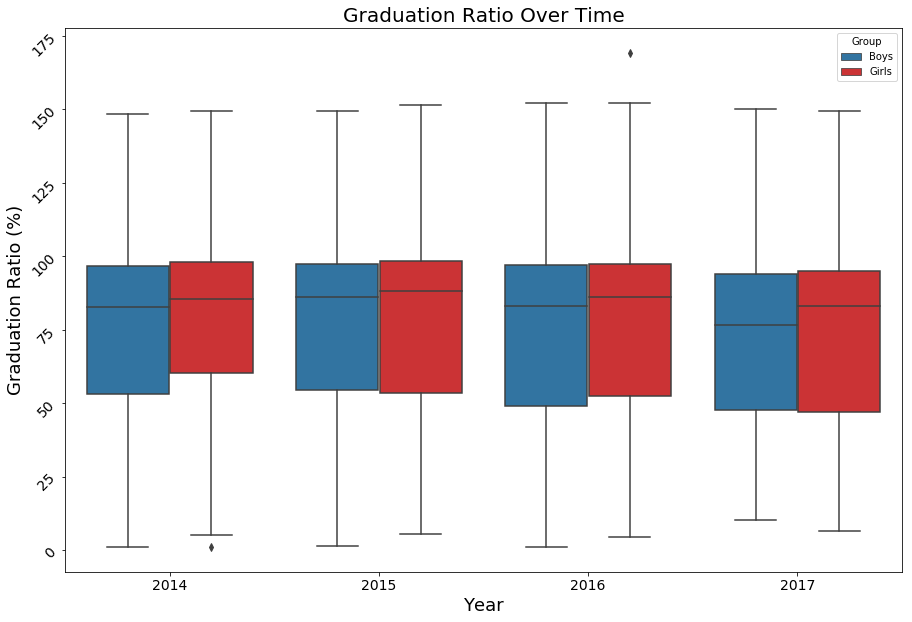

In [6]:
# size
plt.figure(figsize=(15,10))

# title
plt.title('Graduation Ratio Over Time',
         fontsize=20)

# data
sns.boxplot(x="Time", y="Value",
            hue="Indicator", palette=["#1f78b4", '#e41a1c'],
            data=grad_by_country)

#axis
plt.xlabel('Year', fontsize=18)
plt.ylabel('Graduation Ratio (%)', fontsize=18)
plt.tick_params(axis='y', labelrotation=45)
plt.tick_params(labelsize=14)

#legend
plt.legend(title='Group')

# plt.show()
plt.savefig('BoxPlot')